### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

### Import Dataset

In [2]:
df = pd.read_csv("Wind_Velocity_Wake.csv")
df

,Wind_Velocity,Frequency,TSR,Wind_velocity_Wake
0,5.5,0.521,4.189,5.480
1,7.0,0.663,4.189,7.132
2,8.5,0.805,4.189,8.470
3,11.5,1.090,4.189,11.450
4,13.0,1.090,3.705,13.123
5,14.5,1.090,3.322,14.460
6,17.5,1.090,2.750,17.460
7,19.0,1.090,2.535,18.957


In [3]:
# Features
X = df[["Wind_Velocity", "Frequency", "TSR"]]

# Target
y = df["Wind_velocity_Wake"]

**Scaling**

In [4]:
scaler = StandardScaler()

# For Training
X_train = scaler.fit_transform(X)

# For Testing
X_test = scaler.transform(X)

# Ridge Regression

In [5]:
# Ridge Regression Object
r = Ridge(alpha = 0.1)

# Fit Training data into model
r.fit(X_train, y)

# Prediction on Test set
pred_r = r.predict(X_test)

# Comparison
pd.DataFrame({"Actual": y,
              "Predicted": pred_r})

,Actual,Predicted
0,5.480,5.601095
1,7.132,7.031776
2,8.470,8.462458
3,11.450,11.328836
4,13.123,13.154988
5,14.460,14.750015
6,17.460,17.496126
7,18.957,18.706707


### Error Values Ridge Regression

In [6]:
# R Squared 
r_r2 = r2_score(y, pred_r)
print("R Squared =", r_r2.round(6), "\n")

# Mean Biased Error
r_mbe = np.mean(y - pred_r)
print("Mean Biased Error =", r_mbe.round(6), "\n")

# Mean Absolute Error
r_mae = MAE(y, pred_r)
print("Mean Absolute Error =", r_mae.round(6), "\n")

# Mean Squared Error
r_mse = MSE(y, pred_r)
print("Mean Squared Error =", r_mse.round(6), "\n")

# Root Mean Squared Error
r_rmse = MSE(y, pred_r)**0.5
print("Root Mean Squared Error =", r_rmse.round(6), "\n")

# Mean Absolute Percentage Error
r_mape = MAPE(y, pred_r)
print("Mean Absolute Percentage Error =", r_mape.round(6))

R Squared = 0.998854 

Mean Biased Error = -0.0 

Mean Absolute Error = 0.119806 

Mean Squared Error = 0.023566 

Root Mean Squared Error = 0.153513 

Mean Absolute Percentage Error = 0.010674


### Graph of Prediction using Ridge Regression

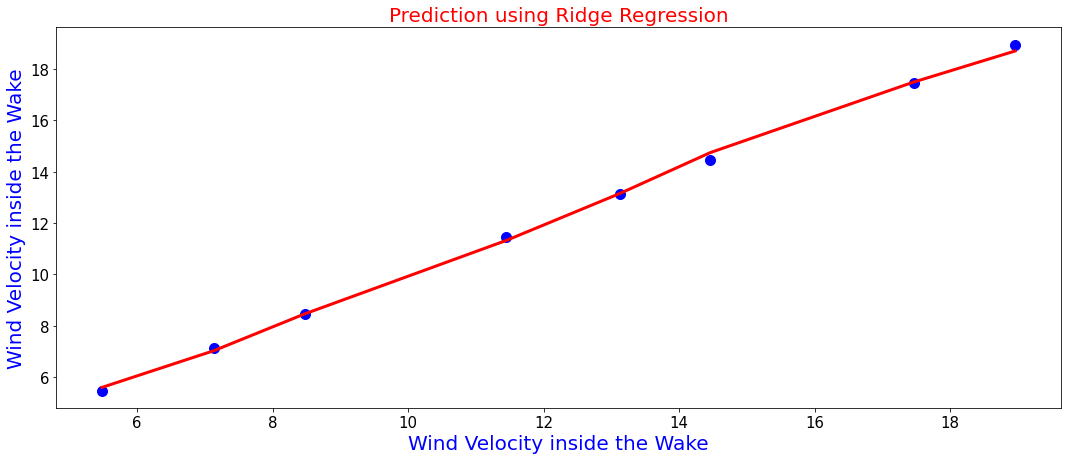

In [7]:
plt.figure(figsize = (18, 7))

plt.scatter(y, y, color = "blue", s = 100)
plt.plot(y, pred_r, color = "red", linewidth = 3)

plt.title("Prediction using Ridge Regression", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Wind Velocity inside the Wake", size = 20, color = "blue")
plt.ylabel("Wind Velocity inside the Wake", size = 20, color = "blue")
plt.savefig("Ridge_Regression.png")
plt.show()

### Custom Prediction (Ridge Regression)

In [8]:
pred_rc = r.predict(scaler.transform([[7.3, 0.517, 4.181]]))
print("Prediction using Ridge Regression =", pred_rc)

Prediction using Ridge Regression = [6.46164155]


# Stochastic Gradient Descent Regression

In [9]:
# Stochastic Gradient Descent Regression Object
sgd = SGDRegressor()

# Fit training data into model 
sgd.fit(X_train, y)

# Prediction
pred_sgd = sgd.predict(X_test)

# Comparison
pd.DataFrame({"Actual": y,
              "Predicted": pred_sgd})

,Actual,Predicted
0,5.480,5.272639
1,7.132,6.724298
2,8.470,8.175958
3,11.450,11.085414
4,13.123,12.955892
5,14.460,14.557106
6,17.460,17.242336
7,18.957,18.395667


### Error Values Stochastic Gradient Descent Regressor

In [10]:
# R Squared 
sgd_r2 = r2_score(y, pred_sgd)
print("R Squared =", sgd_r2.round(6), "\n")

# Mean Biased Error
sgd_mbe = np.mean(y - pred_sgd)
print("Mean Biased Error =", sgd_mbe.round(6), "\n")

# Mean Absolute Error
sgd_mae = MAE(y, pred_sgd)
print("Mean Absolute Error =", sgd_mae.round(6), "\n")

# Mean Squared Error
sgd_mse = MSE(y, pred_sgd)
print("Mean Squared Error =", sgd_mse.round(6), "\n")

# Root Mean Squared Error
sgd_rmse = MSE(y, pred_sgd)**0.5
print("Root Mean Squared Error =", sgd_rmse.round(6), "\n")

# Mean Absolute Percentage Error
sgd_mape = MAPE(y, pred_sgd)
print("Mean Absolute Percentage Error =", sgd_mape.round(6))

R Squared = 0.994963 

Mean Biased Error = 0.265336 

Mean Absolute Error = 0.289613 

Mean Squared Error = 0.103554 

Root Mean Squared Error = 0.321798 

Mean Absolute Percentage Error = 0.027886


### Graph of Prediction using Stochastic Gradient Descent Regression

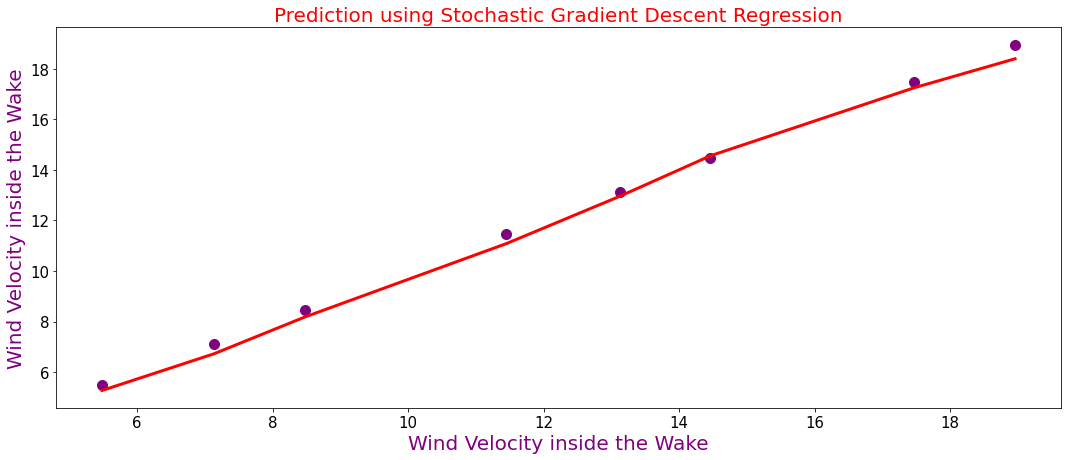

In [11]:
plt.figure(figsize = (18, 7))

plt.scatter(y, y, color = "purple", s = 100)
plt.plot(y, pred_sgd, color = "red", linewidth = 3)

plt.title("Prediction using Stochastic Gradient Descent Regression", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Wind Velocity inside the Wake", size = 20, color = "purple")
plt.ylabel("Wind Velocity inside the Wake", size = 20, color = "purple")
plt.savefig("SGDRegression.png")
plt.show()

### Custom Prediction (Stochastic Gradient Descent Regression)

In [12]:
pred_sgdc = sgd.predict(scaler.transform([[5.4, 0.519, 4.185]]))
print("Prediction using Stochastic Gradient Descent Regression =", pred_sgdc)

Prediction using Stochastic Gradient Descent Regression = [5.23235158]


# XGBoost Regression

In [13]:
# XGBoost Regression Object
xgb = XGBRegressor()

# Fit Training Data into model
xgb.fit(X_train, y)

# Prediction
pred_xgb = xgb.predict(X_test)

# Comparison
pd.DataFrame({"Actual": y,
              "Predicted": pred_xgb})

,Actual,Predicted
0,5.480,5.480756
1,7.132,7.130479
2,8.470,8.470245
3,11.450,11.451787
4,13.123,13.123025
5,14.460,14.459987
6,17.460,17.459824
7,18.957,18.955891


### Error Values XGBoost Regressor

In [14]:
# R Squared 
xgb_r2 = r2_score(y, pred_xgb)
print("R Squared =", xgb_r2.round(6), "\n")

# Mean Biased Error
xgb_mbe = np.mean(y - pred_xgb)
print("Mean Biased Error =", xgb_mbe.round(6), "\n")

# Mean Absolute Error
xgb_mae = MAE(y, pred_xgb)
print("Mean Absolute Error =", xgb_mae.round(6), "\n")

# Mean Squared Error
xgb_mse = MSE(y, pred_xgb)
print("Mean Squared Error =", xgb_mse.round(6), "\n")

# Root Mean Squared Error
xgb_rmse = MSE(y, pred_xgb)**0.5
print("Root Mean Squared Error =", xgb_rmse.round(6), "\n")

# Mean Absolute Percentage Error
xgb_mape = MAPE(y, pred_xgb)
print("Mean Absolute Percentage Error =", xgb_mape.round(6))

R Squared = 1.0 

Mean Biased Error = 1e-06 

Mean Absolute Error = 0.000704 

Mean Squared Error = 1e-06 

Root Mean Squared Error = 0.000962 

Mean Absolute Percentage Error = 7.6e-05


### Graph of Prediction using XGBoost Regression

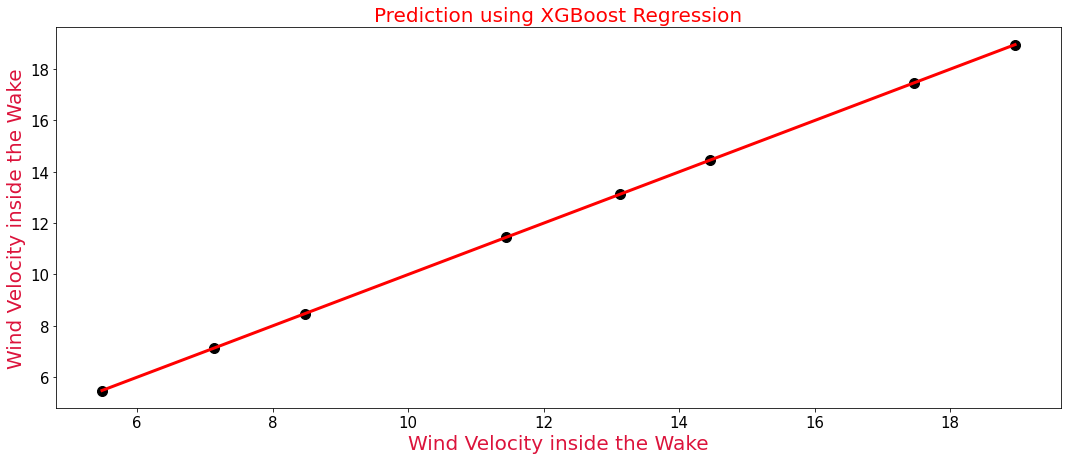

In [15]:
plt.figure(figsize = (18, 7))

plt.scatter(y, y, color = "black", s = 100)
plt.plot(y, pred_xgb, color = "red", linewidth = 3)

plt.title("Prediction using XGBoost Regression", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Wind Velocity inside the Wake", size = 20, color = "crimson")
plt.ylabel("Wind Velocity inside the Wake", size = 20, color = "crimson")
plt.savefig("XGBoost.png")
plt.show()

### Custom Prediction (XGBoost Regression)

In [16]:
pred_xgbr = xgb.predict(scaler.transform([[5.4, 0.519, 4.185]]))
print("Prediction using Ridge Regression =", pred_xgbr)

Prediction using Ridge Regression = [5.480756]


# Errors Comparison

In [17]:
errors = pd.DataFrame({"Models": ["Ridge Regression", "Stochastic Graduent Descent Regression", "XGBoost Regression"],
                       "R Squared": [r_r2, sgd_r2, xgb_r2],
                       "MBE": [r_mbe, sgd_mbe, xgb_mbe],
                       "MAE": [r_mae, sgd_mae, xgb_mae],
                       "MSE": [r_mse, sgd_mse, xgb_mse],
                       "RMSE": [r_rmse, sgd_rmse, xgb_rmse],
                       "MAPE": [r_mape, sgd_mape, xgb_mape]})

errors.set_index("Models")

,R Squared,MBE,MAE,MSE,RMSE,MAPE
Models,,,,,,
Ridge Regression,0.998854,-1.332268e-15,0.119806,2.356622e-02,0.153513,0.010674
Stochastic Graduent Descent Regression,0.994963,2.653362e-01,0.289613,1.035537e-01,0.321798,0.027886
XGBoost Regression,1.000000,8.859634e-07,0.000704,9.251530e-07,0.000962,0.000076
